In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gseapy as gp 
from gseapy.plot import barplot, dotplot
import seaborn as sns

In [25]:
data=pd.read_excel("../data/raw/MP_CDR_ES16072021_TMT10plex_v01.xlsx",engine='openpyxl')


In [ ]:
# Define a subset of significant data 

significant_subset=data[(data['Significance']>data['Significance'].max()/2) & (data['-10lgP']>data['-10lgP'].max()/2)]

In [27]:
significant_subset.head()

,Protein Group,Protein ID,Accession,Significance,-10lgP,Intensity TMT10-126,Intensity TMT10-127N,Intensity TMT10-127C,Intensity TMT10-128N,Intensity TMT10-128C,...,Ratio 11(TMT10-127C; TMT10-128N),Ratio 32(TMT10-128C; TMT10-129N),Ratio 39(TMT10-129C; TMT10-130N),Ratio 40(TMT10-130C; TMT10-131),Coverage (%),#Peptides,#Unique,PTM,Avg. Mass,Description
2,17,11,P02829|HSP82_YEAST,20.10,322.57,902100,884300,1288000,912500,914700,...,1.24,1.03,1.41,1.41,12,32,6,TMT10plex; Deamidation (NQ),81406,ATP-dependent molecular chaperone HSP82 OS=Sac...
4,58,28,P16861|PFKA1_YEAST,22.64,292.02,11000000,10990000,10210000,10150000,11630000,...,0.93,1.06,0.95,1.00,26,27,26,TMT10plex,107970,ATP-dependent 6-phosphofructokinase subunit al...
6,53,35,P07264|LEUC_YEAST,23.03,288.93,10770000,10770000,8707000,9901000,16190000,...,0.86,1.42,1.11,1.40,34,24,24,TMT10plex; Oxidation (M); Deamidation (NQ),85794,3-isopropylmalate dehydratase OS=Saccharomyces...
8,79,70,P38891|BCA1_YEAST,21.13,281.78,6205000,6261000,5705000,5717000,11690000,...,0.92,1.80,1.27,1.50,46,17,14,TMT10plex; Deamidation (NQ),43596,Branched-chain-amino-acid aminotransferase mi...
10,30,51,P14126|RL3_YEAST,18.72,278.73,33880000,33300000,33110000,33780000,27410000,...,1.01,0.82,0.91,0.87,42,21,21,TMT10plex; Oxidation (M); Deamidation (NQ),43758,60S ribosomal protein L3 OS=Saccharomyces cere...


In [34]:
significant_subset.columns
significant_subset.index=significant_subset["Accession"]

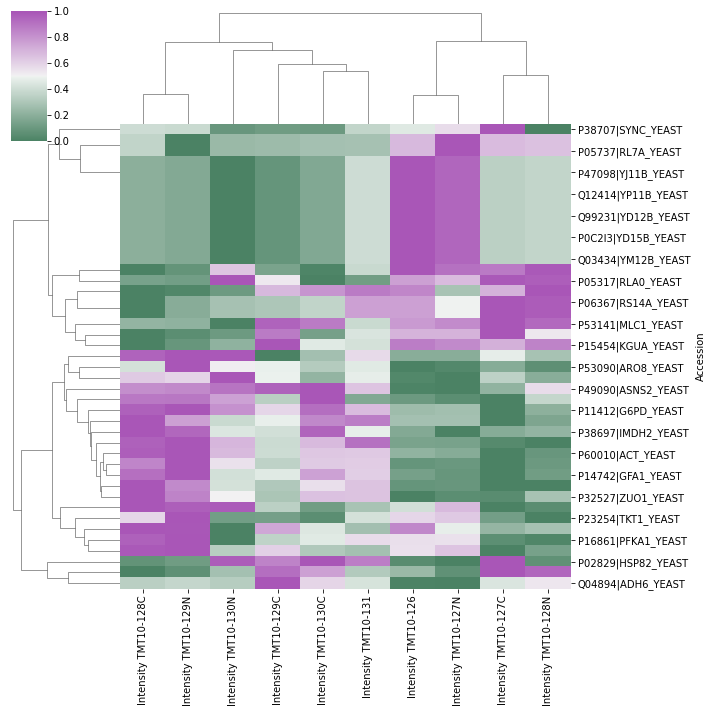

In [36]:

colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)
g=sns.clustermap(significant_subset[["Intensity TMT10-126","Intensity TMT10-127N","Intensity TMT10-127C","Intensity TMT10-128N",'Intensity TMT10-128C', 'Intensity TMT10-129N',
       'Intensity TMT10-129C', 'Intensity TMT10-130N', 'Intensity TMT10-130C',
       'Intensity TMT10-131']],standard_scale=0,cmap=colors)

In [58]:
indexes=["|","_YEAST"]

gene_list=significant_subset.index.tolist()

gene_list_curated=[]
for genes in gene_list:
   
    string = genes
    index = string.find(indexes[0]) #stores the index of a substring or char
    tmp=string[index:] #returns the chars before the seen char or substring
    index_0=tmp.find(indexes[1])

    gene_list_curated.append(tmp[:index_0].replace("|",""))


In [63]:
#gene_list=data_sl['target_node'].squeeze().str.strip().tolist()

#gene_list=['CDC24','CDC42', 'NRP1', 'BEM1', 'BEM3', 'BEM2', 'RDI1','CLA4']

yeast = gp.get_library_name(database='Yeast')
sets=[yeast[2],yeast[5],yeast[8] ] #['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018']
#%% enrichment 
i=0
enr = gp.enrichr(gene_list=gene_list_curated,
                 gene_sets=sets[i],
                 organism='Yeast', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='../data/processed/enrich-analysis/TEST',
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
               )